<AxesSubplot:title={'center':'Programming languages per year'}, xlabel='(lien, count)'>

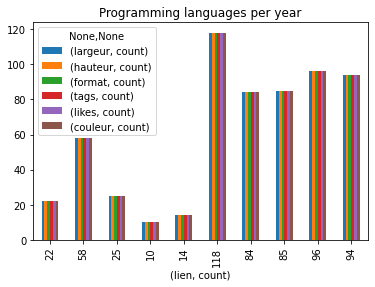

In [3]:
from pandas import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy
from sklearn.cluster import MiniBatchKMeans
import math

#ouverture des fichiers précédemment créés
with open("label.json",'r') as jsonTab:
    dataTab = json.load(jsonTab)
dataframeTab = json_normalize(dataTab)

with open("user.json",'r') as jsonUser:
    dataUser = json.load(jsonUser)
dataframeUser = json_normalize(dataUser)

grouped=dataframeTab.groupby("auteur").agg(['count'])
grouped.plot(x=0, kind='bar', title="Nombre de tableaux par auteur")

In [ ]:
from pandas import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy
from sklearn.cluster import MiniBatchKMeans
import math

#ouverture des fichiers précédemment créés
with open("label.json",'r') as jsonTab:
    dataTab = json.load(jsonTab)

with open("user.json",'r') as jsonUser:
    dataUser = json.load(jsonUser)


data=[]
result=[]
for lien in dataUser[0]["likes"]:
    for tableau in dataTab:
        if lien == tableau["lien"]:
            data.append([tableau["auteur"],tableau["format"],tableau["tags"]])
            result.append(1)

for lien in dataUser[0]["unlikes"]:
    for tableau in dataTab:
        if lien == tableau["lien"]:
            data.append([tableau["auteur"],tableau["format"],tableau["tags"]])
            result.append(0)


#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2,
                  random_state=0)
rfc = rfc.fit(dataframe, resultframe.values.ravel())

#prediction
prediction = rfc.predict([
        [le1.transform(['red'])[0], le2.transform(['nature'])[0],
         le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))
print(rfc.feature_importances_)